In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
sys.path.append("..")
from mergetree import *
from matching import *
from matching_plots import *
import pyts.datasets

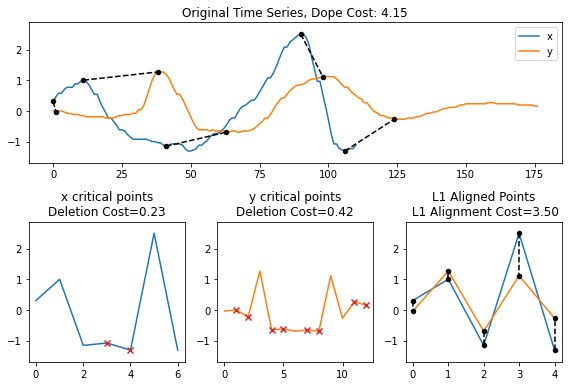

In [2]:
dataset = "AllGestureWiimoteX"
res = pyts.datasets.fetch_ucr_dataset(dataset)
idx = np.argsort(res['target_train'])
X = res['data_train'][idx, :]


circular = False
plt.figure(figsize=(8, 8))

i = 211
j = 212

x = X[i, :]
x = x[~np.isnan(x)]
xc, xs, xc_idx = get_crit_timeseries(x, circular)

y = X[j, :]
y = y[~np.isnan(y)]
yc, ys, yc_idx = get_crit_timeseries(y, circular)
cost, xdel, ydel = dope_match(x, y, circular)
plt.clf()
plot_dope_matching(x, y, xc, xs, xc_idx, yc, ys, yc_idx, cost, xdel, ydel, plot_matches=True, plot_verified=False)
plt.savefig("WiiDOPE{}_{}.svg".format(i, j), bbox_inches='tight', facecolor='white')

Time Elapsed: 0.010


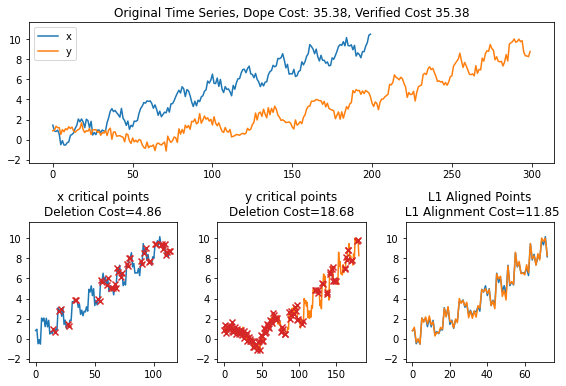

In [3]:
circular=False
np.random.seed(0)
N = 200
t = np.linspace(0.01, 0.98, N)
x = np.cos(2*np.pi*t*10) + t*10
x += 0.3*np.random.randn(N)
N = 300
t = np.linspace(0.01, 0.98, N)
y = np.cos(2*np.pi*(t**2)*10) + (t**2)*10
y += 0.3*np.random.randn(N)

xc, xs, xc_idx = get_crit_timeseries(x, circular)
yc, ys, yc_idx = get_crit_timeseries(y, circular)

tic = time.time()
cost, xdel, ydel = dope_match(x, y, circular)
toc = time.time()
print("Time Elapsed: {:.3f}".format(toc-tic))

plt.figure(figsize=(8, 8))
plot_dope_matching(x, y, xc, xs, xc_idx, yc, ys, yc_idx, cost, xdel, ydel, plot_matches=False, plot_verified=True)

In [4]:
print("Upper bound: ", np.sum(xc*xs) + np.sum(yc*ys))

Upper bound:  81.83255253539738


In [5]:
print([x[1]-x[0] for x in ydel])
print(ydel)

[4, 20, 6, 4, 8, 16, 2, 2, 2, 4, 2, 4, 6, 2, 2, 2, 2, 2, 2, 6, 6, 2, 2]
[[  0   4]
 [  5  25]
 [ 26  32]
 [ 33  37]
 [ 38  46]
 [ 47  63]
 [ 64  66]
 [ 67  69]
 [ 70  72]
 [ 76  80]
 [ 81  83]
 [ 87  91]
 [ 94 100]
 [104 106]
 [122 124]
 [125 127]
 [131 133]
 [137 139]
 [141 143]
 [144 150]
 [161 167]
 [170 172]
 [178 180]]


# Wasserstein Matching

In [6]:
MT = MergeTree()
I, _ = MT.init_from_timeseries(x)
MT = MergeTree()
J, _ = MT.init_from_timeseries(y)

Text(0.5, 1.0, 'Dist = 29.196')

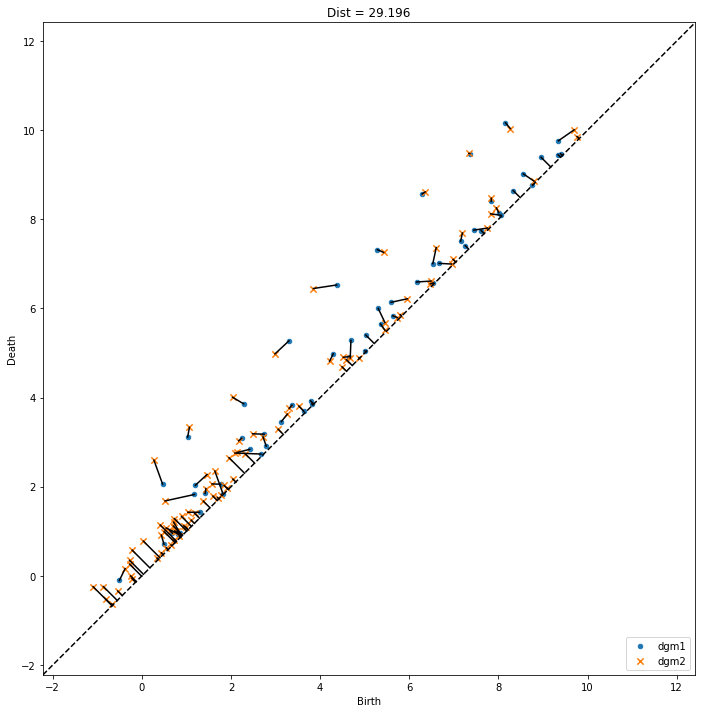

In [7]:
from persim import plot_diagrams
dist, matching = wasserstein(I, J, True)
plt.figure(figsize=(12, 12))
plot_wasserstein_matching(I, J, matching)
plt.title("Dist = {:.3f}".format(dist))

In [8]:
# Check against hera
from gudhi import hera
print(hera.wasserstein_distance(I, J, order=1, internal_p=1))

29.19591672462873
